# 5-1. 벡터화

단어를 벡터화하는 방법 중 하나인 워드 임베딩  
벡터화를 하는 이유 : 컴퓨터는 텍스트보다 숫자를 잘 처리하기 때문에  


## Bag of words / DTM(Document-Term Matrix)

BoW는 전에 배웠듯이 단어의 순서는 신경쓰지 않고 빈도수만 체크한다.  
유사도를 비교하기 위해 단어 빈도수를 행렬로 나타낸 것이 DTM이다. DTM의 행은 문서 벡터, 열은 단어 벡터이다.
이 DTM의 대부분의 값이 0인 sparsity의 문제점을 가지고 있다. -> 왜 문제가 되는지는 뒤에서 다시 설명할 예정  
이런 벡터를 희소 벡터(sparse vetor)라고 한다. 이번 챕터에서는 단어장의 크기를 v라고 정의. v는 전체 텍스트에 한 번이라도 나왔던 단어 개수이다.  


## TF-IDF

DTM은 빈도수가 많을 수 밖에 없는 불용어와 같은 단어들을 중요하다고 판단하는 문제가 있다. 그래서 단어마다 가중치를 다르게 주는 TF-IDF가 등장했다. 하지만 여전히 TF-IDF의 단어장 크기는 v여서 희소벡터이다.

## 원-핫 인코딩(one-hot encoding)

모든 단어의 관계를 독립적으로 정의하는 원-핫 인코딩  
단어장의 모든 단어에 1부터 v까지 인덱싱을 하고 해당 단어의 인덱스 위치만 1이고 나머지는 전부 0의 값을 가지는 벡터로 표현 : 원-핫 벡터

# 5-2. 벡터화 실습: 원-핫 인코딩 구현해보기

## Step 1. 패키지 설치하기

In [1]:
# $ pip install konlpy
import re
from konlpy.tag import Okt
from collections import Counter
print("임포트 완료")

임포트 완료


In [2]:
text = "임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어."
text

'임금님 귀는 당나귀 귀! 임금님 귀는 당나귀 귀! 실컷~ 소리치고 나니 속이 확 뚫려 살 것 같았어.'

## Step 2. 전처리 이야기

전체 텍스트에서 한글과 공백을 제외한 모든 특수문자를 제거하고 싶다  
-> 한글의 범위 : ㄱ ~ ㅎ, ㅏ ~ ㅣ, 가-힣  
-> 정규 표현식 : \[^ㄱ-ㅎㅏ-ㅣ가-힣 \]

In [3]:
reg = re.compile("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]")
text = reg.sub('', text)
print(text)

임금님 귀는 당나귀 귀 임금님 귀는 당나귀 귀 실컷 소리치고 나니 속이 확 뚫려 살 것 같았어


## Step 3. 토큰화 이야기

교착어 한글에 맞게 형태소 분석기로 토큰화  
여기서는 Okt 형태소 분석기 사용

In [4]:
okt=Okt()
tokens = okt.morphs(text)
print(tokens)

['임금님', '귀', '는', '당나귀', '귀', '임금님', '귀', '는', '당나귀', '귀', '실컷', '소리', '치고', '나니', '속이', '확', '뚫려', '살', '것', '같았어']


## Step 4. 단어장 만들기

빈도수대로 정수로 인덱싱  
여기서는 파이썬의 Counter 서브클래스를 사용해서 단어의 빈도를 카운트

In [5]:
vocab = Counter(tokens)
print(vocab)

Counter({'귀': 4, '임금님': 2, '는': 2, '당나귀': 2, '실컷': 1, '소리': 1, '치고': 1, '나니': 1, '속이': 1, '확': 1, '뚫려': 1, '살': 1, '것': 1, '같았어': 1})


In [6]:
vocab['임금님']

2

most_common()는 상위 빈도수를 가진 단어를 주어진 수만큼 리턴  

In [7]:
vocab_size = 5
vocab = vocab.most_common(vocab_size) # 등장 빈도수가 높은 상위 5개의 단어만 저장
print(vocab)

[('귀', 4), ('임금님', 2), ('는', 2), ('당나귀', 2), ('실컷', 1)]


빈도수가 클 수록 작은 정수 인덱스를 부여해보자


In [8]:
word2idx={word[0] : index+1 for index, word in enumerate(vocab)}
print(word2idx)

{'귀': 1, '임금님': 2, '는': 3, '당나귀': 4, '실컷': 5}


## Step 5: 원-핫 벡터 만들기

원-핫 인코딩을 하는 함수를 만들어서 원-핫 벡터를 만들자

In [9]:
def one_hot_encoding(word, word2index):
       one_hot_vector = [0]*(len(word2index))
       index = word2index[word]
       one_hot_vector[index-1] = 1
       return one_hot_vector
print("슝=3")

슝=3


In [10]:
one_hot_encoding("임금님", word2idx)

[0, 1, 0, 0, 0]

## 케라스를 통한 원-핫 인코딩(one-hot encoding)

텐서플로의 케라스 API를 사용해보자  
단어장을 만드는 역할을 해주는 케라스 Tokenizer와 원-핫 인코딩을 위한 도구인 to_categorical을 사용  


In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
print("임포트 완료")

임포트 완료


In [12]:
# 예시
text = [['강아지', '고양이', '강아지'],['애교', '고양이'], ['컴퓨터', '노트북']]
text

[['강아지', '고양이', '강아지'], ['애교', '고양이'], ['컴퓨터', '노트북']]

In [13]:
# 단어에 고유한 정수 맵핑
t = Tokenizer()
t.fit_on_texts(text)
print(t.word_index) # 각 단어에 대한 인코딩 결과 출력.

{'강아지': 1, '고양이': 2, '애교': 3, '컴퓨터': 4, '노트북': 5}


In [14]:
# 단어장 크기 저장
vocab_size = len(t.word_index) + 1

단어장 크기에 1을 더해주는 이유는 실제로 패딩 작업을 위한 0번 토큰이 더해주는 경우가 많기 때문이다. 여기서는 0번 단어도 고려해주는 것이 좋다는 정도로만 이해하자.  


In [15]:
sub_text = ['강아지', '고양이', '강아지', '컴퓨터']
encoded = t.texts_to_sequences([sub_text])
print(encoded)

[[1, 2, 1, 4]]


In [16]:
# to_categorical()을 사용하면 원-핫 벡터의 시퀀스로 변환
one_hot = to_categorical(encoded, num_classes = vocab_size)
print(one_hot)

[[[0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0.]]]


단어장 크기가 6차원인 것을 확인할 수 있다.

# 5-3. 워드 임베딩

## 희소 벡터의 문제점 : 차원의 저주

차원의 저주를 이해하기 위해 극과 극의 예시를 들어보자. 같은 정보를 저차원과 고차원에 저장한다고 해보자.  
저차원에서는 정보의 밀도는 상대적을 커지지만  
고차원에서는 정보의 밀도가 작아진다. 이렇게 밀도가 작아지면 머신 러닝 모델을 학습하기가 훨씬 어려워지고 더 많은 데이터 양을 필요로 한다.  
원-핫 벡터는 내적을 해도 직교의 값인 0만 나와서 단어간의 유사도를 표현할 수가 없다.  
-> 이 대안으로 단어장보다 적은 차원의 밀집 벡터(dense vector)를 학습하는 **워드 임베딩(Word embedding)** 이 제안 되었다.  
워드 임베딩을 통해 얻는 밀집 벡터를 임베딩 벡터라고 한다.  

## 워드 임베딩(Word Embedding)


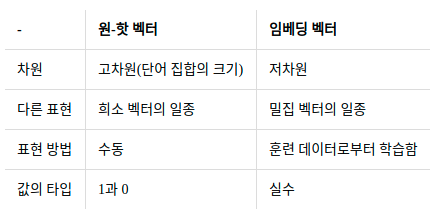
출처 : https://wikidocs.net/33520

2003년에 요슈아 교수가 NPLM(Neural Probabilistic Language Model) 제안  
-> 2013년 구글은 NPLM을 개선하여 정밀도와 속도를 향상시킨 Word2Vec을 제안  
-> 그 이후 FastText나 GloVe 등과 같은 임베딩 방법이 추가로 제안  
-> 2023에는 내가... 한번....?

# 5-4. Word2Vec (1) 분포 가설

[Korean Word2Vec](https://word2vec.kr/search/) 사이트에 '박찬호 - 야구 + 축구'라는 수식을 넣으면 '호나우두'가 나오는데 이런 의미적 연산이 어떻게 가능한걸까?  


## 분포 가설(Distributional Hypothesis)

Word2Vec의 핵심 아이디어는 분포 가설(distributional hypothesis)을 따른다.  
분포 가설 : ‘비슷한 문맥에서 같이 등장하는 경향이 있는 단어들은 비슷한 의미를 가진다.’  
같이 자주 등장하는 단어끼리는 유사도가 높은 벡터로 만든다.  

# 5-5. Word2Vec (2) CBoW

Word2Vec은 크게 두 가지 방법이 있다. CBoW와 Skip-gram 이다.  
CBoW는 주변에 있는 단어들을 통해 중간에 있는 단어들을 예측하는 방법  
Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법  
매커니즘은 거의 동일하다.  

## CBoW(Continuous Bag of words)

예문 : "I like natural language processing"  
중간 단어인 natural을 예측하는 것이 CBoW가 하는 일  
이때 예측해야 하는 단어 "natural"을 중심 단어(center word)라고 하고, 예측에 사용되는 단어들을 주변 단어(context word)  
앞, 뒤로 몇 개의 단어를 볼지를 결정했다면 이 범위를 윈도우(window)라고 한다.  
윈도우 크기가 m일 때, 실제 중심 단어를 예측하기 위해 참고하려고 하는 주변 단어의 개수는 앞,뒤 모두 다해서 2m개이다.  
윈도우를 계속 움직여서 주변 단어와 중심 단어를 바꿔가며 학습을 위한 데이터 셋을 만들 수 있는데, 이 방법을 슬라이딩 윈도우(sliding window)라고 한다.   
아래 그림은 윈도우 크기가 1이면서 슬라이딩 윈도우 하는 것이다.  

![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/Untitled_23.png)  
이렇게 선택된 데이터 set에서 각각 단어는 원-핫 인코딩되어 원-핫 벡터가 되고, 원-핫 벡터가 CBoW나 Skip-gram의 입력이 된다.  
![](https://aiffelstaticprd.blob.core.windows.net/media/images/Untitled_24.max-800x600.png)
위의 그림은 CBoW의 매커니즘  
윈도우 크기가 m개일 때, 2m개의 주변 단어를 이용해 1개의 중심 단어를 예측하는 과정에서 두 가중치 행렬(matrix)을 학습하는 것이 목적  
그림에서 주황색 사각형이 첫 번째 가중치 행렬 $W$, 그리고 초록색 사각형이 두 번째 가중치 행렬 $W'$  
입력층, 은닉층, 출력층 이렇게 3개의 층으로만 구성된 인공 신경망 -> 딥 러닝 아니고 얕은 신경망(Shallow Neural Network)을 학습  

**입력층 -> 은닉층**  
***
CBoW 신경망 구조에서 주변 단어 각각의 원-핫 벡터는 입력층에 위치하고 중심 단어의 원-핫 벡터가 위치한 곳은 출력층이다.  

단어장의 크기는 v로 이미 고정되어 있지만 은닉층의 크기는 하이퍼파라미터이다. 은닉층의 크기를 N이라고 해보자.  
![](https://aiffelstaticprd.blob.core.windows.net/media/images/Untitled_25.max-800x600.png)  
원-핫 벡터가 가중치 행렬$W$과 곱해진데 이때 $W$는 VxN의 크기이다. 그런데 원-핫 벡터는 가중치 행렬의 i행을 가져오는 것과 동일하기 때문에 그대로 룩업(lookup)해오는 것과 같다고 하여 룩업 테이블(lookup table)이라고 한다.  
룩업 테이블을 거쳐서 생긴 2m개의 주변 단어 벡터들은 각각 N의 크기를 가진다. 봐라 N은 하이퍼파라미터이다. 
Word2Vec에서의 은닉층은 활성화 함수가 존재하지 않고, 단순히 가중치 행렬과의 곱셈만을 수행하기에 기존 신경망의 은닉층과 구분 지어 투사층(projection layer)이라고도 한다.  - 활성화 함수가 없어도 괜찮은 이유는? 출력층에서 곱하니까 

**은닉층 -> 출력층**  
***
![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/Untitled_26.png)  
은닉층에서 만들어진 N차원 벡터는 크기가 NxV인 $W'$와 곱해진다.  
출력된 V차원 벡터는 활성화 함수(Softmax)를 거쳐서 모든 차원의 총합니아 1이 되는 벡터로 변경된다.  

CBoW는 이 출력층의 벡터를 중심 단어의 원-핫 벡터와의 손실(loss)을 최소화하도록 학습시킨다.  
이 과정에서 첫 번째 가중치 행렬 $W$와 두 번째 가중치 행렬 $W'$가 업데이트 된다.

학습이 다 되었다면 N차원의 크기를 갖는 W의 행이나 W′의 열로부터 어떤 것을 임베딩 벡터로 사용할지를 결정하면 됩니다. 때로는 W와 W′의 평균치를 가지고 임베딩 벡터를 선택하기도 한다.  
W의 행벡터이나 W′의 열벡터 모두 임베딩 벡터이기 때문이다. 그 기준은? 결과로 판단하지 않을까?

# 5-6. Word2Vec (3) Skip-gram과 Negative Sampling
## Skip-gram

![](https://aiffelstaticprd.blob.core.windows.net/media/images/Untitled_28.max-800x600.png)

skip-gram도 CBoW와 메커지즘은 자체는 동일하지만, 중간에 은닉층에서 다수의 벡터의 덧셈과 평균을 구하는 과정이 없어졌다는 점만 다르다.

## 네거티브 샘플링(negative sampling)

대체적으로 Word2Vec 사용은 Skip-Gram + Negative Sampling를 뜻한다. 줄여서 SGNS라고 한다.  
Skip_gram은 단어장의 크기가 커질 수록 연산량이 많아져 작업이 느려진다.  
그런데 연관관계과 없는 단어들의 임베딩 값은 업데이트할 필요가 없다. 이 부분을 황용한 것이 네거티브 샘플링이다.  
네거티브 샘플링은 연산량을 줄이기 위해서 소프트맥스 함수를 사용한 V개 중 1개를 고르는 다중 클래스 분류 문제를 시그모이드 함수를 사용한 이진 분류 문제로 바꾸는 것이다.  
기존 skip-gram은 중심 단어에서 주변단어를 예측하는 방식이었다.  
![](https://aiffelstaticprd.blob.core.windows.net/media/images/Untitled_29.max-800x600.png)
네거티브 샘플링을 하면 아래처럼 바뀐다.
![](https://aiffelstaticprd.blob.core.windows.net/media/images/Untitled_30.max-800x600.png)  
중신 단어와 주변 단어를 같이 받아서 이웃관계면 1을 아니면 0을 출력도록 말이다. 즉, 다중 분류 문제에서 이진 분류 문제로 바뀐 것이다.  

예문과 함께 기존 skip-gram의 데이터셋을 만들어보자  
예문 : Thou shalt not make a machine in the likeness of a human mind  
윈도우 크기가 2일 때, 슬라이딩 윈도우를 통해서 만들어지는 데이터셋은 아래와 같다.  
![](https://aiffelstaticprd.blob.core.windows.net/media/images/Untitled_31.max-800x600.png)  
우선 슬라이딩 윈도우를 통해서 만들어진 정상적인 데이터셋에는 1이라는 레이블을 달아준다.  
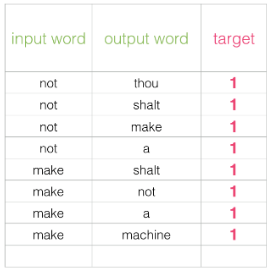

이웃 관계가 아니면 0으로 레이블을 단다. 랜덤으로 단어장에 있는 아무 단어나 가져와 target word로하는 거짓 데이타셋을 만들고 0으로 레이블링 해주면 된다. 거짓(negative) 데이터셋을 만들기 때문에 이 방법이 네거티브 샘플링이라고 한다.  
여기까지가 데이터셋을 만든 것이다.  
이 데이터셋으로 학습하면 이진 분류 문제로 간주할 수 있다.  
중심 단어와 주변 단어를 내적하고, 출력층의 시그모이드 함수를 지나게 하여 1 또는 0의 레이블로부터 오차를 구해서 역전파를 수행한다.  
![](https://aiffelstaticprd.blob.core.windows.net/media/images/Untitled_34.max-800x600.png)  


# 5-7. Word2Vec (4) 영어 Word2Vec 실습과 OOV 문제

## 영어 Word2Vec 실습

여기서 사용할 훈련 데이터는 NLTK에서 제공하는 코퍼스이며, gensim 패키지는 토픽 모델링을 위한 NLP 패키지이다.

In [17]:
import nltk
nltk.download('abc')
nltk.download('punkt')

[nltk_data] Downloading package abc to /home/aiffel-dj35/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt to /home/aiffel-
[nltk_data]     dj35/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.corpus import abc
corpus = abc.sents()

In [19]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [20]:
print('코퍼스의 크기 :',len(corpus))

코퍼스의 크기 : 29059


In [21]:
# gensim 3.x.x 버젼
from gensim.models import Word2Vec

model = Word2Vec(sentences = corpus, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
print("모델 학습 완료!")

모델 학습 완료!


파라미터 톺아보기  
+ size = 학습 후 임베딩 벡터의 차원.
+ window = 컨텍스트 윈도우 크기
+ min_count = 단어 최소 빈도수 제한 (빈도가 적은 단어들은 학습하지 않아요.)
+ workers = 학습을 위한 프로세스 수
+ sg = 0은 CBoW, 1은 Skip-gram.  


In [22]:
# 코사인 유사도가 높은 단어들을 출력하는 model.wv.most_similar  
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.9316573143005371), ('Bang', 0.9225993156433105), ('third', 0.9179672002792358), ('asteroid', 0.9176913499832153), ('rally', 0.9139665365219116), ('skull', 0.9121574759483337), ('dog', 0.9062922596931458), ('dinosaur', 0.9042255282402039), ('infant', 0.9041048288345337), ('bought', 0.9034522771835327)]


 학습한 모델을 저장해두었다가 필요할 때 로드하는 방법    
 저장 -> model.wv.save_word2vec_format  
 load -> KeyedVectors.load_word2vec_format

In [23]:
from gensim.models import KeyedVectors

model.wv.save_word2vec_format('~/aiffel/word_embedding/w2v') 
loaded_model = KeyedVectors.load_word2vec_format("~/aiffel/word_embedding/w2v")
print("모델  load 완료!")

모델  load 완료!


로드한 모델이 이전과 동일한 결과를 출력하는지 확인하기 

In [24]:
model_result = loaded_model.wv.most_similar("man")
print(model_result)

[('woman', 0.9316573143005371), ('Bang', 0.9225993156433105), ('third', 0.9179672002792358), ('asteroid', 0.9176913499832153), ('rally', 0.9139665365219116), ('skull', 0.9121574759483337), ('dog', 0.9062922596931458), ('dinosaur', 0.9042255282402039), ('infant', 0.9041048288345337), ('bought', 0.9034522771835327)]


/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


## Word2Vec의 OOV 문제

Out of Vocabulary 사전에 없는 단어는 Word2Vec에서 임베딩 벡터값을 얻을 수 없다.  
단어장에 없는 단어일 수 도 있고, 오타가 발생했을 경우에도 그러하다.  
-> 해결 방법 : FastText

# 5-8. 임베딩 벡터의 시각화

구글이 공개한 임베딩 벡터의 기각화 오픈소스인 임베딩 프로젝터를 사용해서 임베딩 벡터를 시각화해보자.  
가까운 거리의 임베딩 벡터의 군집을 볼 수도 있고, 특정 임베딩 벡터와 유클리드 거리나 코사인 유사도가 높은지 확인할 수도 있다.  

## 필요한 파일 만들기

이미 저장된 모델로부터 벡터값이 저장된 파일과 메타파일을 얻어야 한다. 앞서 저장한 'w2c'을 이용해보자  
```
$ python -m gensim.scripts.word2vec2tensor --input ~/aiffel/word_embedding/w2v --output ~/aiffel/word_embedding/w2v
```
해당 커맨드를 수행하면 두 개의 파일이 ~/aiffel/word_embedding 경로에 생성되는데, w2v_metadata.tsv와 w2v_tensor.tsv 파일이다.

## 임베딩 프로젝터에 tsv 파일 업로드하기

아래 링크고 이동한다.  
링크 : https://projector.tensorflow.org/  
Load -> step 1 에는 tensor.tsv-> step 2 에는 metadata.tsv  
마우스를 통해서 화면을 돌려보고 임베딩 벡터들의 군집을 확인해보자.

# 5-9. FastText

Facebook에서 개발한 FastText는 Word2Vec 이후에 등장한 워드 임베딩 방법  
매커니즘은 Word2Vec과 동일하지만 문자 단위 n-gram(character-level n-gram) 표현을 학습한다.  
단어 내부의 내부 단어(subwords)들을 학습한다는 뜻이다.  

FastText의 n-gram에서 n은 단어들이 얼마나 분리되는지 결정하는 하이퍼파라미터입니다. n을 3으로 잡은 트라이그램(tri-gram)의 경우, 단어 "partial"은 'par', 'art', 'rti', 'tia', 'ial'로 분리하고 이들을 벡터로 만든다. 이 6개의 내부 단어 토큰 맨앞, 뒤에 <,>를 추가하여 벡터로 만든다. 추가적으로 \<partial> 도 벡터화한다.  
```
# n = 3인 경우, FastText는 단어 partial에 대해 임베딩되는 n-gram 토큰들  
<pa, art, rti, tia, ial, al>, <partial>
```

실제 사용할 때는 n의 최솟값과 최댓값으로 범위를 설정할 수 있다.  
gensim 패키지 default값은 3~6인데, 이 경우에  "partial"에 대해서 FastText는 아래 내부 단어들을 벡터화한다.
```
<pa, art, rti, ita, ial, al>, <par, arti, rtia, tial, ial>, <part, ...중략... , <partial>
```
각각 단어들에 대해서 Word2Vec을 수행하고 최종적으로는 이렇게 벡터화된 n-gram 벡터들의 총합을 해당 단어의 벡터로 취한다.  
```
partial = <pa + art + rti + ita + ial + al> + <par + arti + rtia + tial + ial> + <part + ...중략...  + <partial>
```



## FastText의 학습 방법

네거티브 샘플링 마저도 학습 방식이 Word2Vec과 동일하지만, 학습 과정에서 중심 단어에 속한 문자 단위 n-gram 단어 벡터들을 모두 업데이트한다는 점이 다르다.  


## OOV와 오타에 대한 대응

FastText는 Word2Vec과 달리 OOV와 오타에 강건하다는 특징  
How? -> 단어장에 없는 단어라도, 해당 단어의 n-gram이 다른 단어에 존재한다면 이로부터 벡터값을 얻는다는 원리에 기인  
실습해보자.  
Word2Vec에서 사용했던 동일한 훈련 데이터, corpus를 가지고 학습해보자.  


In [25]:
from gensim.models import FastText
fasttext_model = FastText(corpus, size=100, window=5, min_count=5, workers=4, sg=1)
print("FastText 학습 완료!")

FastText 학습 완료!


Word2Vec에서는 단어장에서 없던 'overacting'을 찾아내지 못했는데 FastText는 어떨까?

In [26]:
fasttext_model.most_similar('overacting')

/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('extracting', 0.9433094263076782),
 ('attracting', 0.9321538209915161),
 ('emptying', 0.928466260433197),
 ('lifting', 0.9277039170265198),
 ('boosting', 0.9261746406555176),
 ('mixing', 0.9246435165405273),
 ('debilitating', 0.9230678081512451),
 ('shooting', 0.9206901788711548),
 ('reflecting', 0.9204163551330566),
 ('fluctuating', 0.9204054474830627)]

In [27]:
fasttext_model.most_similar('memoryy')

/home/aiffel-dj35/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('memory', 0.9482613801956177),
 ('musical', 0.860119640827179),
 ('music', 0.8495030403137207),
 ('violence', 0.8470398187637329),
 ('video', 0.8466416001319885),
 ('intelligence', 0.8410091996192932),
 ('visual', 0.8326354026794434),
 ('technical', 0.8303933143615723),
 ('mechanisms', 0.8294735550880432),
 ('basic', 0.8261146545410156)]

## 한국어에서의 FastText

영어에서는 알파벳 단위 n-gram이었다면 한국어의 경우에는 음절 단위로 수행할 수 있다.  
**(1) 음절 단위 FastText**  
n = 3일때, 단어 '텐서플로우'의 트라이그램 벡터들은  
```
<텐서, 텐서플, 서플로, 플로우>, <텐서플로우>
```
**(2) 자소 단위 FastText** : 이게 꽤 잘 동작한다고 소문남  
단어에 대해서 초성, 중성, 종성을 분리한다고 하고 종성이 존재하지 않는 경우에는 \_라는 토큰을 대신 사용해서 토큰화  
n = 3일 때, 단어 '텐서플로우'는  
```
<ㅌㅔ,ㅌㅔㄴ,ㅔㄴㅅ,ㄴㅅㅓ,ㅅㅓ_, …중략… >
```

# 5-10. GloVe

글로브(Global Vectors for Word Representation, GloVe)는 2014년에 미국 스탠포드 대학에서 개발  
카운트 기반과 예측 기반 두 가지 방법을 모두 사용했다.  
여기서 카운트 기반 방법 -> DTM을 차원 축소하여 밀집 표현(dense representation)으로 임베딩 하는 LSA(Latent Semantic Analysis)라는 방법  


## 카운트 기반 -> 잠재 의미 분석 / LSA(Latent Semantic Analysis)

LSA를 요약하면 DTM에 특잇값 분해를 사용하여 잠재된 의미를 이끌어내는 방법론이다.  
한계점은 2가지가 있는데,  
(1) 차원 축소의 특성으로 인해 새로운 단어가 추가되면 다시 DTM을 만들어 새로 다시 차원 축소를 해야 한다  
(2) 단어 벡터간 유사도를 계산하는 측면에서 Word2Vec보다 성능이 떨어진다  

## 예측 기반 -> Word2Vec
Word2Vec의 경우에는 LSA보다 단어 벡터 간 유사도를 구하는 능력은 뛰어나기 때문에 Word2Vec도 사용한다.  

## 윈도우 기반 동시 등장 행렬(Window based Co-occurrence Matrix)

GloVe를 이해하기 위해서는 윈도우 기반 동시 등장 행렬의 정의에 대해서 이해할 필요  
Example corpus:
```
I like deep learning.
I like NLP.
I enjoy flying.
```
![](https://aiffelstaticprd.blob.core.windows.net/media/images/Cap_2020-03-12_20-48-35-686.max-800x600.png)
동시 등장 행렬  
: 어떤 i 단어의 윈도우 크기(여기서는 1) 내에서 k단어가 등장한 횟수를 i행 k열에 기재한 행렬


## 동시 등장 확률(Co-occurrence Probability)

동시 등장 확률 $P(k|i)$는 동시 등장 행렬로부터 특정 단어 i의 전체 등장 횟수를 카운트하고, 특정 단어 i가 등장했을 때 어떤 단어 k가 등장한 횟수를 카운트하여 계산한 조건부 확률. 이때 i를 중심 단어(center word), k를 주변 단어(context word)라고 한다.  


## GloVe의 손실 함수 설계하기

동시 등장 확률을 이용해 손실 함수를 설계한다.  
동시 등장 행렬을 사용하고 있으니 코퍼스의 전체적인 통계 정보를 활용하는 '카운트 기반'의 방법론이면서, 손실 함수를 통해 모델을 학습시키므로 '예측 기반'의 방법론이라고 할 수 있다.  

GloVe의 아이디어 : 전체 코퍼스에서의 동시 등장 빈도의 로그값과 중심 단어 벡터와 주변 단어 벡터의 내적값의 차이가 최소화되도록 두 벡터의 값을 학습하는 것

GloVe 손실 함수 : $J=Σ^V_{i,j=1}f(X_{ij})(w^T_iw_j^~+b_i+b_j^~−logX_{ij})^2$  
![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/Untitled_39.png)

$f(X_{ij})$ 는 가중치 함수이다.  
GloVe의 연구진은 동시 등장 행렬에서 동시 등장 빈도의 값 $f(X_{ik})$이 굉장히 낮은 경우에는 거의 도움이 되지 않는 정보라고 판단  
-> $f(X_{ik})$의 영향을 받는 가중치 함수를 도입. 아래의 그래프 참조.  
![](https://aiffelstaticprd.blob.core.windows.net/media/original_images/Untitled_41.png)  
불용어처럼 동시 등장 빈도수가 높을 때 지나친 가중을 주지 않기 위해 최대값은 1 이다.  


## GloVe 실습

해당 패키지는 python 3.6까지만 지원하는 관계로, aiffel 이름의 아나콘다 가상환경이 python 3.7을 사용한다면 아래 코드는 실행할 수 없습니다. 지금은 대략적인 실습 방법만 소개해 드리겠습니다. 기회가 되면, python 3.6환경 (anaconda, colab 등을 활용)에서 직접 실습해보자.   
나는 3.7.9여서 colab 에서 돌려야겠다.  

```
$ pip install glove_python

## NLTK에서 제공하는 영화 리뷰 데이터
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

from nltk.corpus import movie_reviews
corpus=movie_reviews.sents()

## 이 코퍼스로 GloVe를 훈련
from glove import Corpus, Glove

# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성
emb = Corpus() 
emb.fit(corpus, window=5)

# 벡터의 차원은 100, 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(emb.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(emb.dictionary)

## 유사한 단어들 확인
model_result1 = glove.most_similar("man")
print(model_result1)
model_result2 = glove.most_similar("fiction")
print(model_result2)
```
